In [1]:
import hail as hl
from hail.plot import show

Loading BokehJS ...

In [2]:
import numpy as np
from collections import Counter

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits import mplot3d

In [13]:
import os
import pandas as pd

In [4]:
hl.init(default_reference='GRCh38')

/opt/conda/lib/python3.10/site-packages/hailtop/aiocloud/aiogoogle/user_config.py:44: UserWarning:

Reading spark-defaults.conf to determine GCS requester pays configuration. This is deprecated. Please use `hailctl config set gcs_requester_pays/project` and `hailctl config set gcs_requester_pays/buckets`.

SLF4J: No SLF4J providers were found.
SLF4J: Defaulting to no-operation (NOP) logger implementation
SLF4J: See https://www.slf4j.org/codes.html#noProviders for further details.
SLF4J: Class path contains SLF4J bindings targeting slf4j-api versions 1.7.x or earlier.
SLF4J: Ignoring binding found at [jar:file:/usr/lib/spark/jars/log4j-slf4j-impl-2.18.0.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See https://www.slf4j.org/codes.html#ignoredBindings for an explanation.
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
Running on Apache Spark version 3.3.0
SparkUI available at http://all-of-us-4275-m.

In [5]:
loadings = hl.read_table('gs://fc-aou-datasets-controlled/v7/wgs/short_read/snpindel/aux/ancestry/loadings.ht')

In [6]:
ancestry_preds_tbl = hl.import_table(
    'gs://fc-aou-datasets-controlled/v7/wgs/short_read/snpindel/aux/ancestry/ancestry_preds.tsv',
    types={ 'pca_features': hl.tarray(hl.tfloat64) }
)

ancestry_preds_tbl.show(20)

2024-03-05 09:54:44.447 Hail: INFO: Reading table without type imputation1) / 1]
  Loading field 'research_id' as type str (not specified)
  Loading field 'ancestry_pred' as type str (not specified)
  Loading field 'probabilities' as type str (not specified)
  Loading field 'pca_features' as type array<float64> (user-supplied)
  Loading field 'ancestry_pred_other' as type str (not specified)


,,,,
research_id,ancestry_pred,probabilities,pca_features,ancestry_pred_other
str,str,str,array<float64>,str
"""1000004""","""eur""","""[0.0, 0.0, 0.01, 0.99, 0.0, 0.0]""","[1.01e-01,1.36e-01,-6.32e-03,5.22e-02,3.26e-03,1.63e-02,1.60e-02,-2.15e-03,-1.44e-03,1.01e-03,1.43e-03,-5.13e-04,5.04e-05,-6.64e-04,8.59e-04,-1.32e-03]","""eur"""
"""1000033""","""eur""","""[0.0, 0.0, 0.01, 0.99, 0.0, 0.0]""","[9.83e-02,1.25e-01,-9.63e-03,4.32e-02,3.48e-03,2.08e-02,2.26e-02,-2.58e-03,-1.35e-03,6.19e-05,-1.37e-04,4.62e-04,4.82e-04,7.05e-04,6.07e-04,8.18e-04]","""eur"""
"""1000039""","""afr""","""[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]""","[-2.66e-01,4.73e-03,-1.06e-03,1.81e-03,3.15e-02,2.32e-03,6.27e-03,1.32e-02,-1.83e-03,2.63e-03,-1.64e-03,6.89e-03,3.55e-03,2.39e-03,4.75e-03,4.30e-03]","""afr"""
"""1000042""","""afr""","""[0.98, 0.01, 0.0, 0.0, 0.0, 0.01]""","[-2.55e-01,5.97e-03,2.74e-03,8.75e-03,1.02e-02,9.69e-03,-6.93e-04,-2.68e-03,1.04e-02,6.88e-03,3.77e-03,-3.04e-03,-2.77e-03,9.05e-04,2.44e-03,5.67e-03]","""afr"""
"""1000045""","""eas""","""[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]""","[9.73e-02,-1.58e-01,-4.39e-02,3.49e-02,-3.16e-04,-4.19e-03,-3.38e-03,8.09e-04,-1.32e-04,-8.36e-04,2.06e-04,1.80e-04,9.49e-05,-5.99e-04,4.56e-04,-7.37e-04]","""eas"""
"""1000059""","""eur""","""[0.0, 0.01, 0.13, 0.86, 0.0, 0.0]""","[1.01e-01,1.29e-01,-3.49e-03,4.23e-02,1.63e-03,1.31e-02,1.42e-02,-2.32e-03,-3.60e-04,-4.94e-04,2.24e-04,-2.09e-03,8.47e-04,-3.23e-04,4.63e-04,-3.10e-04]","""eur"""
"""1000061""","""eur""","""[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]""","[1.01e-01,1.33e-01,-1.25e-02,4.67e-02,2.54e-03,1.95e-02,2.18e-02,-4.58e-03,-1.88e-03,9.15e-05,-5.87e-04,-2.96e-04,-7.70e-05,-9.73e-04,4.11e-05,-1.93e-03]","""eur"""
"""1000070""","""eur""","""[0.0, 0.0, 0.01, 0.99, 0.0, 0.0]""","[1.01e-01,1.34e-01,-1.11e-02,4.71e-02,2.32e-03,1.92e-02,2.22e-02,-3.75e-03,-2.57e-03,1.39e-06,-2.10e-04,-1.37e-03,-1.88e-04,-5.19e-04,1.80e-03,7.31e-05]","""eur"""


In [7]:
l1 = ancestry_preds_tbl.ancestry_pred_other.collect()

In [8]:
Counter(l1)

Counter({'eur': 123072,
         'afr': 53944,
         'amr': 40838,
         'oth': 19289,
         'eas': 5381,
         'sas': 2342,
         'mid': 528})

In [14]:
# This query represents dataset "Long reads" for domain "person" and was generated for All of Us Controlled Tier Dataset v7
dataset_86956725_person_sql = """
    SELECT
        person.person_id,
        person.gender_concept_id,
        p_gender_concept.concept_name as gender,
        person.birth_datetime as date_of_birth,
        person.race_concept_id,
        p_race_concept.concept_name as race,
        person.ethnicity_concept_id,
        p_ethnicity_concept.concept_name as ethnicity,
        person.sex_at_birth_concept_id,
        p_sex_at_birth_concept.concept_name as sex_at_birth 
    FROM
        `""" + os.environ["WORKSPACE_CDR"] + """.person` person 
    LEFT JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_gender_concept 
            ON person.gender_concept_id = p_gender_concept.concept_id 
    LEFT JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_race_concept 
            ON person.race_concept_id = p_race_concept.concept_id 
    LEFT JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_ethnicity_concept 
            ON person.ethnicity_concept_id = p_ethnicity_concept.concept_id 
    LEFT JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_sex_at_birth_concept 
            ON person.sex_at_birth_concept_id = p_sex_at_birth_concept.concept_id  
    WHERE
        person.PERSON_ID IN (
            SELECT
                distinct person_id  
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` cb_search_person  
            WHERE
                cb_search_person.person_id IN (
                    SELECT
                        person_id 
                    FROM
                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` p 
                    WHERE
                        has_whole_genome_variant = 1 
                ) 
                AND cb_search_person.person_id IN (
                    SELECT
                        person_id 
                    FROM
                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` p 
                    WHERE
                        has_lr_whole_genome_variant = 1 
                ) 
            )"""

dataset_86956725_person_df = pd.read_gbq(
    dataset_86956725_person_sql,
    dialect="standard",
    use_bqstorage_api=("BIGQUERY_STORAGE_API_ENABLED" in os.environ),
    progress_bar_type="tqdm_notebook")

# This query represents dataset "Long reads" for domain "survey" and was generated for All of Us Controlled Tier Dataset v7
dataset_86956725_survey_sql = """
    SELECT
        answer.person_id,
        answer.survey_datetime,
        answer.survey,
        answer.question_concept_id,
        answer.question,
        answer.answer_concept_id,
        answer.answer,
        answer.survey_version_concept_id,
        answer.survey_version_name  
    FROM
        `""" + os.environ["WORKSPACE_CDR"] + """.ds_survey` answer   
    WHERE
        (
            question_concept_id IN (
                SELECT
                    DISTINCT concept_id 
                FROM
                    `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                JOIN
                    (
                        select
                            cast(cr.id as string) as id 
                        FROM
                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                        WHERE
                            concept_id IN (
                                1586134
                            ) 
                            AND domain_id = 'SURVEY'
                    ) a 
                        ON (
                            c.path like CONCAT('%',
                        a.id,
                        '.%')) 
                    WHERE
                        domain_id = 'SURVEY' 
                        AND type = 'PPI' 
                        AND subtype = 'QUESTION'
                    )
            )  
            AND (
                answer.PERSON_ID IN (
                    SELECT
                        distinct person_id  
                    FROM
                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` cb_search_person  
                    WHERE
                        cb_search_person.person_id IN (
                            SELECT
                                person_id 
                            FROM
                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` p 
                            WHERE
                                has_whole_genome_variant = 1 
                        ) 
                        AND cb_search_person.person_id IN (
                            SELECT
                                person_id 
                            FROM
                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` p 
                            WHERE
                                has_lr_whole_genome_variant = 1 
                        ) 
                    )
                )"""

# dataset_86956725_survey_df = pd.read_gbq(
#     dataset_86956725_survey_sql,
#     dialect="standard",
#     use_bqstorage_api=("BIGQUERY_STORAGE_API_ENABLED" in os.environ),
#     progress_bar_type="tqdm_notebook")

# This query represents dataset "Long reads" for domain "zip_code_socioeconomic" and was generated for All of Us Controlled Tier Dataset v7
dataset_86956725_zip_code_socioeconomic_sql = """
    SELECT
        observation.person_id,
        observation.observation_datetime,
        zip_code.zip3_as_string as zip_code,
        zip_code.fraction_assisted_income as assisted_income,
        zip_code.fraction_high_school_edu as high_school_education,
        zip_code.median_income,
        zip_code.fraction_no_health_ins as no_health_insurance,
        zip_code.fraction_poverty as poverty,
        zip_code.fraction_vacant_housing as vacant_housing,
        zip_code.deprivation_index,
        zip_code.acs as american_community_survey_year 
    FROM
        `""" + os.environ["WORKSPACE_CDR"] + """.zip3_ses_map` zip_code 
    JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.observation` observation 
            ON CAST(SUBSTR(observation.value_as_string,
        0,
        STRPOS(observation.value_as_string,
        '*') - 1) AS INT64) = zip_code.zip3  
    WHERE
        observation.PERSON_ID IN (
            SELECT
                distinct person_id  
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` cb_search_person  
            WHERE
                cb_search_person.person_id IN (
                    SELECT
                        person_id 
                    FROM
                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` p 
                    WHERE
                        has_whole_genome_variant = 1 
                ) 
                AND cb_search_person.person_id IN (
                    SELECT
                        person_id 
                    FROM
                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` p 
                    WHERE
                        has_lr_whole_genome_variant = 1 
                ) 
            ) 
            AND observation_source_concept_id = 1585250 
            AND observation.value_as_string NOT LIKE 'Res%'"""

dataset_86956725_zip_code_socioeconomic_df = pd.read_gbq(
    dataset_86956725_zip_code_socioeconomic_sql,
    dialect="standard",
    use_bqstorage_api=("BIGQUERY_STORAGE_API_ENABLED" in os.environ),
    progress_bar_type="tqdm_notebook")

Downloading:   0%|          | 0/1027 [00:00<?, ?rows/s]

Downloading:   0%|          | 0/1027 [00:00<?, ?rows/s]

In [29]:
pmi_skip_ids = list(dataset_86956725_person_df[dataset_86956725_person_df['race'] == 'PMI: Skip']['person_id'].astype(str))

In [30]:
ancestry_preds_skip_tbl = ancestry_preds_tbl.filter(hl.literal(pmi_skip_ids).contains(ancestry_preds_tbl.research_id))
l2 = ancestry_preds_skip_tbl.ancestry_pred_other.collect()

In [41]:
ancestry_preds_df = ancestry_preds_tbl.to_pandas()

In [43]:
ancestry_preds_df[ancestry_preds_df['research_id'].astype(str).isin(pmi_skip_ids)]

,research_id,ancestry_pred,probabilities,pca_features,ancestry_pred_other
4538,1037792,afr,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[-0.25304475814584576, 0.012483769625689069, 0...",afr
19198,1159071,afr,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[-0.2893103688911501, -0.00028292104212143763,...",afr
24562,1203311,afr,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[-0.2701771091147553, 0.008647121040762703, -0...",afr
26898,1222342,afr,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[-0.30012893226429616, -0.0019337285520226607,...",afr
29399,1243443,amr,"[0.25, 0.26, 0.05, 0.23, 0.08, 0.13]","[-0.06087825517536217, 0.06497452404948936, -0...",oth
69302,1575575,afr,"[0.99, 0.01, 0.0, 0.0, 0.0, 0.0]","[-0.254955357317721, 0.006017370918383176, -0....",afr
74393,1617794,afr,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[-0.28032309045414605, -0.0015835341885908096,...",afr
78288,1649460,afr,"[0.99, 0.01, 0.0, 0.0, 0.0, 0.0]","[-0.28136534696274773, -0.004519159795920005, ...",afr
100883,1835685,afr,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[-0.270869128685457, 0.008486007394235, 0.0005...",afr
113252,1938812,afr,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[-0.2985170682116215, -0.0025337741908237877, ...",afr


In [32]:
pc1 = ancestry_preds_tbl.pca_features[0].collect()
pc2 = ancestry_preds_tbl.pca_features[1].collect()
pc3 = ancestry_preds_tbl.pca_features[2].collect()

In [33]:
skip_pc1 = ancestry_preds_skip_tbl.pca_features[0].collect()
skip_pc2 = ancestry_preds_skip_tbl.pca_features[1].collect()
skip_pc3 = ancestry_preds_skip_tbl.pca_features[2].collect()

In [54]:
rids = ancestry_preds_tbl.research_id.collect()

In [83]:
person_ids = list(dataset_86956725_person_df['person_id'].astype(str))

outliers = []
for i in range(len(rids)):
    if rids[i] in person_ids and pc1[i] > 0.05:
        outliers.append(str(rids[i]))
        
outliers

['1353030', '1375011', '1485021', '1867496', '2966274']

In [84]:
ancestry_preds_df[ancestry_preds_df['research_id'].astype(str).isin(outliers)]

,research_id,ancestry_pred,probabilities,pca_features,ancestry_pred_other
42553,1353030,eur,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]","[0.10114140170278405, 0.13037519827995614, -0....",eur
45209,1375011,eur,"[0.0, 0.0, 0.01, 0.99, 0.0, 0.0]","[0.100182328217162, 0.12607187306637208, -0.01...",eur
58374,1485021,amr,"[0.01, 0.47, 0.14, 0.38, 0.0, 0.0]","[0.0963650971362776, 0.11423865619894227, 0.00...",oth
104733,1867496,sas,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]","[0.08304108253207686, 0.005902540129706938, -0...",sas
181463,2966274,eur,"[0.0, 0.0, 0.0, 0.95, 0.0, 0.05]","[0.0884424321722188, 0.1253567811465769, -0.00...",eur


In [88]:
dataset_86956725_person_df[dataset_86956725_person_df['person_id'].astype(str).isin(outliers)].sort_values(by=['person_id'])


,person_id,gender_concept_id,gender,date_of_birth,race_concept_id,race,ethnicity_concept_id,ethnicity,sex_at_birth_concept_id,sex_at_birth
734,1353030,45878463,Female,1961-06-15 00:00:00+00:00,8516,Black or African American,38003564,Not Hispanic or Latino,45878463,Female
364,1375011,45878463,Female,1945-06-15 00:00:00+00:00,2000000008,More than one population,38003564,Not Hispanic or Latino,45878463,Female
57,1485021,45880669,Male,1956-06-15 00:00:00+00:00,8516,Black or African American,38003564,Not Hispanic or Latino,45880669,Male
41,1867496,45880669,Male,1987-06-15 00:00:00+00:00,2000000008,More than one population,38003564,Not Hispanic or Latino,45880669,Male
39,2966274,45880669,Male,1955-06-15 00:00:00+00:00,2000000008,More than one population,38003564,Not Hispanic or Latino,45880669,Male


In [34]:
color_map = {
    'afr': '#D573BE',
    'amr': '#519D3E',
    'eas': '#C53A32',
    'eur': '#3976AF',
    'mid': '#EF8536',
    'sas': '#866BE8',
    'oth': '#84584E'
}

outer_color = "#333333"

#pb_color = "#EFC94C"
pb_color = "#FFFFFF"

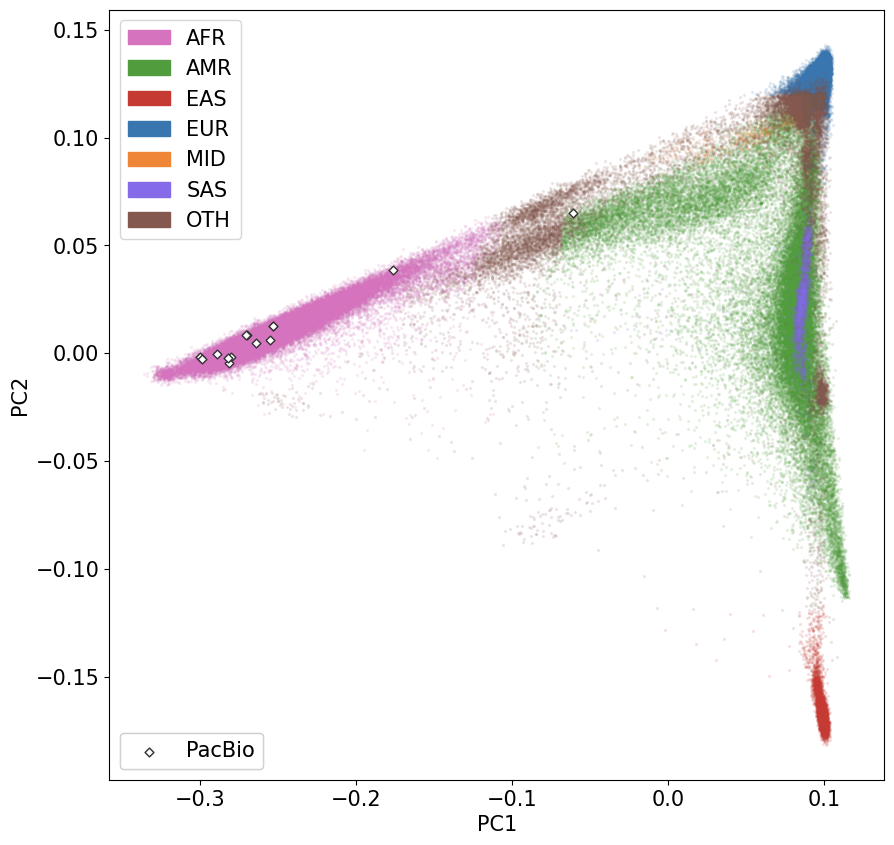

In [36]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 15})

# Create a scatter plot for each population in the full dataset
for pop, color in color_map.items():
    # Filter points belonging to the current population
    indices = [i for i, item in enumerate(l1) if item == pop]
    plt.scatter(
        [pc1[i] for i in indices],
        [pc2[i] for i in indices],
        color=color,
        alpha=0.1,
        s=2,
        label=pop  # Label for legend
    )

a1 = plt.scatter([skip_pc1[0]], [skip_pc2[0]], marker="D", edgecolor=outer_color, color=pb_color, s=20, label='PacBio')
    
plt.scatter(
    skip_pc1,
    skip_pc2,
    marker="D",
    edgecolor=outer_color,
    color=pb_color,
    s=20
)

plt.xlabel("PC1")
plt.ylabel("PC2")

legend1_patches = [mpatches.Patch(color=color, label=pop.upper()) for pop, color in color_map.items()]
legend1 = plt.legend(handles=legend1_patches)
plt.gca().add_artist(legend1)

legend2 = plt.legend(handles=[a1], loc='lower left')
plt.gca().add_artist(legend2)

plt.show()